In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv(r"C:\Users\Tony\Downloads\globalterrorismdb_0718dist.csv", encoding = "ISO-8859-1")

C:\Users\Tony\AppData\Local\Temp\ipykernel_15852\3546934325.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Tony\Downloads\globalterrorismdb_0718dist.csv", encoding = "ISO-8859-1")


In [3]:
newdf=df[["eventid","iyear","iday","success","attacktype1","targtype1","natlty1","weaptype1","nkill","extended","country","region",
          "latitude","longitude","specificity","vicinity","crit1","suicide","nperps","weaptype1"]]

In [4]:
ss=newdf.dropna()

In [5]:
ss.dtypes

eventid          int64
iyear            int64
iday             int64
success          int64
attacktype1      int64
targtype1        int64
natlty1        float64
weaptype1        int64
nkill          float64
extended         int64
country          int64
region           int64
latitude       float64
longitude      float64
specificity    float64
vicinity         int64
crit1            int64
suicide          int64
nperps         float64
weaptype1        int64
dtype: object

C:\Users\Tony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    161632
0     20059
Name: success, dtype: int64

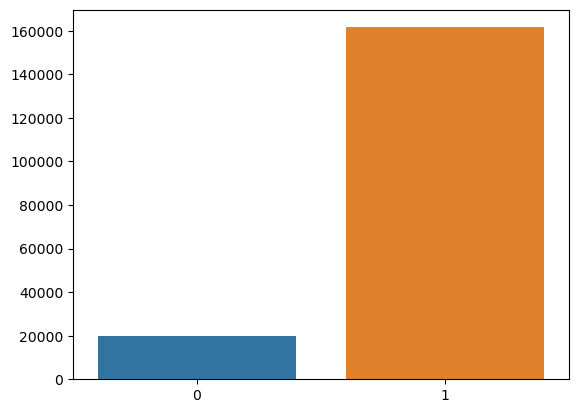

In [6]:
y = df.success.value_counts()
sns.barplot(y.index, y.values)
y

In [7]:
X = ss.drop(['success'], axis=1, inplace=False)  
X

,eventid,iyear,iday,attacktype1,targtype1,natlty1,weaptype1,nkill,extended,country,region,latitude,longitude,specificity,vicinity,crit1,suicide,nperps,weaptype1
1,197000000002,1970,0,6,7,21.0,13,0.0,0,130,1,19.371887,-99.086624,1.0,0,1,0,7.0,13
5,197001010002,1970,1,2,3,217.0,5,0.0,0,217,1,37.005105,-89.176269,1.0,0,1,0,-99.0,5
6,197001020001,1970,2,1,3,218.0,5,0.0,0,218,3,-34.891151,-56.187214,1.0,0,1,0,3.0,5
7,197001020002,1970,2,3,21,217.0,6,0.0,0,217,1,37.791927,-122.225906,1.0,0,1,0,-99.0,6
8,197001020003,1970,2,7,4,217.0,8,0.0,0,217,1,43.076592,-89.412488,1.0,0,1,0,1.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,31,2,4,182.0,5,1.0,0,182,11,2.359673,45.385034,2.0,0,1,0,-99.0,5
181687,201712310029,2017,31,3,4,167.0,6,2.0,0,200,10,35.407278,35.942679,1.0,1,1,0,-99.0,6
181688,201712310030,2017,31,7,14,160.0,8,0.0,0,160,5,6.900742,124.437908,2.0,0,1,0,-99.0,8
181689,201712310031,2017,31,3,2,92.0,6,0.0,0,92,6,24.798346,93.940430,1.0,0,1,0,-99.0,6


In [8]:
Y=ss['success']
Y

1         1
5         1
6         0
7         1
8         1
         ..
181686    1
181687    1
181688    1
181689    0
181690    0
Name: success, Length: 104040, dtype: int64

# Modeling:

## Decision Tree Classifier

In [15]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split( X, Y, test_size = 0.3, random_state = 100)
# import the regressor 
from sklearn.tree import DecisionTreeClassifier 
# create a regressor object 
decision_Tree_Classifier = DecisionTreeClassifier (random_state = 0) 
decision_Tree_Classifier.fit(X_train_DT, y_train_DT) 
# predicting a new value 
# test the output 
y_pred_DT = decision_Tree_Classifier.predict(X_test_DT) 

final_model_predictions_DT = pd.DataFrame({'Actual':y_test_DT, 'predictions':y_pred_DT})
print(final_model_predictions_DT)

# how did our model perform?
count_misclassified = (y_test_DT != y_pred_DT).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_DT = np.round(metrics.accuracy_score(y_test_DT, y_pred_DT),1)*100
print( 'Total Accuracy : ',accuracy_DT)

        Actual  predictions
135079       1            1
151904       1            1
173677       1            1
169196       1            1
148161       1            1
...        ...          ...
166869       1            1
135081       1            1
164899       0            1
72240        1            1
180401       1            1

[31212 rows x 2 columns]
Misclassified samples: 3556
Total Accuracy :  90.0


## Logistic Regression

In [56]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split( X, Y, test_size = 0.3, random_state = 100)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train_LR, y_train_LR)
predictions_LR = logmodel.predict(X_test_LR)

final_model_predictions_LR = pd.DataFrame({'Actual':y_test_LR, 'predictions':predictions_LR})
print(final_model_predictions_LR)

count_misclassified = (y_test_LR != predictions_LR).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_LR = metrics.accuracy_score(y_test_LR, predictions_LR)
print('Accuracy: {:.2f}'.format(accuracy))

        Actual  predictions
135079       1            1
151904       1            1
173677       1            1
169196       1            1
148161       1            1
...        ...          ...
166869       1            1
135081       1            1
164899       0            1
72240        1            1
180401       1            1

[31212 rows x 2 columns]
Misclassified samples: 4093
Accuracy: 0.87


## Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split( X, Y, test_size = 0.3, random_state = 100)

gnb = GaussianNB()
gnb.fit(X_train_NB, y_train_NB)
y_pred_NB=gnb.predict(X_test_NB)

final_model_predictions_NB = pd.DataFrame({'Actual':y_test_NB, 'predictions':y_pred_NB})
print(final_model_predictions_NB)

count_misclassified = (y_test_NB != y_pred_NB).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_NB = metrics.accuracy_score(y_test_NB, y_pred_NB)
accuracy_NB='{:.3f}'.format(accuracy_NB)
accuracy_NB = float(accuracy_NB)*100
print('Accuracy: {:.2f}'.format(accuracy_NB))

        Actual  predictions
135079       1            1
151904       1            1
173677       1            1
169196       1            1
148161       1            1
...        ...          ...
166869       1            1
135081       1            1
164899       0            1
72240        1            1
180401       1            1

[31212 rows x 2 columns]
Misclassified samples: 4093
Accuracy: 86.90


## Random Forest

In [58]:
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split( X, Y, test_size = 0.3, random_state = 100)
clf = RandomForestClassifier(n_estimators = 500, random_state = 42)
# Instantiate model with 1000 decision trees
clf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
clf.fit(X_train_RF, y_train_RF);
# use the model to make predictions with the test data
y_pred_RF = clf.predict(X_test_RF)
# combining 2 numpy arrays into one pandas dataframe
final_model_predictions_RF = pd.DataFrame({'Actual':y_test_RF, 'predictions':y_pred_RF})
print(final_model_predictions_RF)

# how did our model perform?
count_misclassified = (y_test_RF != y_pred_RF).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_RF = metrics.accuracy_score(y_test_RF, y_pred_RF)
print('Accuracy: {:.4f}'.format(accuracy_RF))

        Actual  predictions
135079       1            1
151904       1            1
173677       1            1
169196       1            1
148161       1            1
...        ...          ...
166869       1            1
135081       1            1
164899       0            1
72240        1            1
180401       1            1

[31212 rows x 2 columns]
Misclassified samples: 2310
Accuracy: 0.9260


# Evaluation Metric:

In [22]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  # correct 0 is sensitivity and correct is specificity

## Decision Tree Classifier

[[ 2411  1682]
 [ 1874 25245]]
              precision    recall  f1-score   support

           0       0.56      0.59      0.58      4093
           1       0.94      0.93      0.93     27119

    accuracy                           0.89     31212
   macro avg       0.75      0.76      0.75     31212
weighted avg       0.89      0.89      0.89     31212



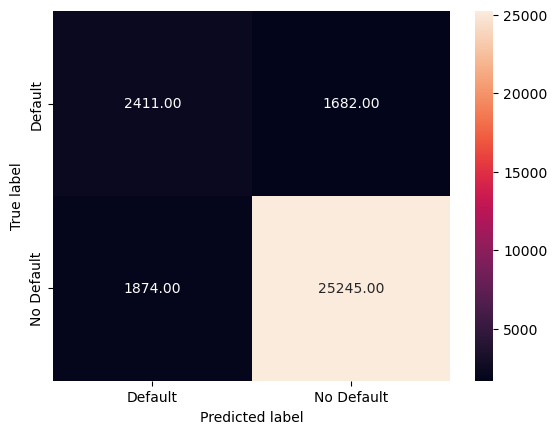

Total Accuracy :  90.00
recall 0.8860694604639241
Precision 0.8860694604639241


In [23]:
print(confusion_matrix(y_test_DT, y_pred_DT))
print(classification_report(y_test_DT, y_pred_DT))
draw_cm( final_model_predictions_DT.Actual, final_model_predictions_DT.predictions ) 


accuracy_DT=np.round( metrics.accuracy_score( final_model_predictions_DT.Actual, final_model_predictions_DT.predictions  ),1)*100
accuracy_DT='{:.2f}'.format(accuracy_DT)
print( 'Total Accuracy : ',accuracy_DT)
recall_DT=metrics.recall_score(final_model_predictions_DT.Actual, final_model_predictions_DT.predictions,average='micro' )
print('recall',recall_DT)
Precision_DT=metrics.precision_score(final_model_predictions_DT.Actual, final_model_predictions_DT.predictions,average='micro' )
print('Precision',Precision_DT)

## Logistic Regression

[[    0  4093]
 [    0 27119]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4093
           1       0.87      1.00      0.93     27119

    accuracy                           0.87     31212
   macro avg       0.43      0.50      0.46     31212
weighted avg       0.75      0.87      0.81     31212



C:\Users\Tony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


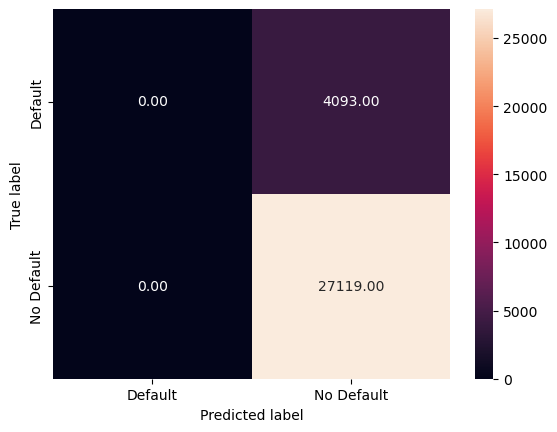

Total Accuracy :  87.00
recall 0.8688645392797641
Precision 0.8688645392797641


In [57]:
print(confusion_matrix(y_test_LR, predictions_LR))
print(classification_report(y_test_LR, predictions_LR))
draw_cm( final_model_predictions_LR.Actual, final_model_predictions_LR.predictions ) 

accuracy_LR=np.round(metrics.accuracy_score( final_model_predictions_LR.Actual, final_model_predictions_LR.predictions ),2 )*100
accuracy_LR='{:.2f}'.format(accuracy_LR)
print( 'Total Accuracy : ',accuracy_LR)
recall_LR=metrics.recall_score(final_model_predictions_LR.Actual, final_model_predictions_LR.predictions,average='micro' )
print('recall',recall_LR)
Precision_LR=metrics.precision_score(final_model_predictions_LR.Actual, final_model_predictions_LR.predictions,average='micro' )
print('Precision',Precision_LR)

## Naive Bayes

[[    0  4093]
 [    0 27119]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4093
           1       0.87      1.00      0.93     27119

    accuracy                           0.87     31212
   macro avg       0.43      0.50      0.46     31212
weighted avg       0.75      0.87      0.81     31212



C:\Users\Tony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


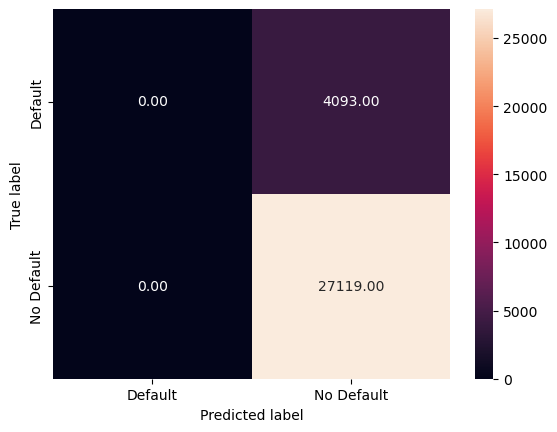

Total Accuracy :  86.90
recall 0.8688645392797641
Precision 0.8688645392797641


In [36]:
print(confusion_matrix(y_test_NB, y_pred_NB))
print(classification_report(y_test_NB, y_pred_NB))
draw_cm( final_model_predictions_NB.Actual, final_model_predictions_NB.predictions ) 


accuracy_NB='{:.2f}'.format(accuracy_NB)
print( 'Total Accuracy : ',accuracy_NB)
recall_NB=metrics.recall_score(final_model_predictions_NB.Actual, final_model_predictions_NB.predictions,average='micro' )
print('recall',recall_NB)
Precision_NB=metrics.precision_score(final_model_predictions_NB.Actual, final_model_predictions_NB.predictions,average='micro' )
print('Precision',Precision_NB)

## Random Forest

[[ 2239  1854]
 [  456 26663]]
              precision    recall  f1-score   support

           0       0.83      0.55      0.66      4093
           1       0.93      0.98      0.96     27119

    accuracy                           0.93     31212
   macro avg       0.88      0.77      0.81     31212
weighted avg       0.92      0.93      0.92     31212



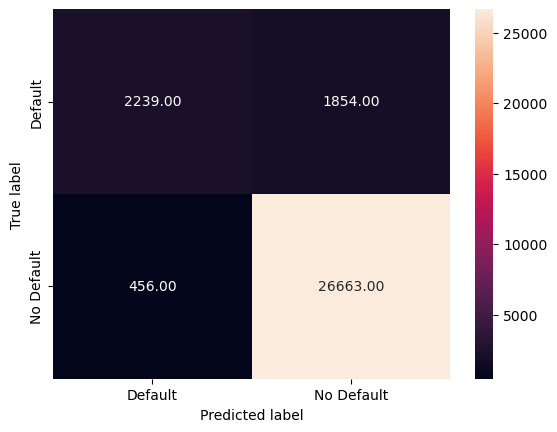

Total Accuracy :  93.00
recall : 0.9831852206939784
Precision : 0.934986148613108


In [59]:
print(confusion_matrix(y_test_RF, y_pred_RF))
print(classification_report(y_test_RF, y_pred_RF))
draw_cm( final_model_predictions_RF.Actual, final_model_predictions_RF.predictions )   # correct 0 is sensitivity and correct is specificity

accuracy_RF=np.round( metrics.accuracy_score( final_model_predictions_RF.Actual, final_model_predictions_RF.predictions  ),2)*100
accuracy_RF='{:.2f}'.format(accuracy_RF)
print( 'Total Accuracy : ',accuracy_RF )
recall_RF=metrics.recall_score(final_model_predictions_RF.Actual, final_model_predictions_RF.predictions )
print('recall :',recall_RF)
precision_RF=metrics.precision_score(final_model_predictions_RF.Actual, final_model_predictions_RF.predictions )
print('Precision :',precision_RF)

In [63]:
table=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_DT,accuracy_LR,accuracy_NB],
                    "Recall":[recall_RF,recall_DT,recall_LR,recall_NB],
                    "Precision ":[precision_RF,Precision_DT,Precision_LR,Precision_NB]},
                   index=["Random Forest","Decision Tree Classifier","Logistic Regression","Naive Bayes"])
table

,Accuracy,Recall,Precision
Random Forest,93.00,0.983185,0.934986
Decision Tree Classifier,90.00,0.886069,0.886069
Logistic Regression,87.00,0.868865,0.868865
Naive Bayes,86.90,0.868865,0.868865
